'lc' Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.0 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.0,<2.1"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSets which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach both these ParameterSets for us.

In [3]:
ps, constraints = phoebe.dataset.lc()
print ps

ParameterSet: 3 parameters
                           times: [] d
                          fluxes: [] W / m2
                          sigmas: [] W / m2


In [4]:
ps_dep = phoebe.dataset.lc_dep()
print ps_dep

ParameterSet: 8 parameters
                ld_func@_default: interp
              ld_coeffs@_default: [ 0.5  0.5]
                        passband: Johnson:V
                intens_weighting: energy
              pblum_ref@_default: 
                  pblum@_default: 12.5663706144 W
                              l3: 0.0 W / m3
                         exptime: 0.0 s


### times

In [5]:
print ps['times']

Parameter: times
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### fluxes

In [6]:
print ps['fluxes']

Parameter: fluxes
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [7]:
print ps['sigmas']

Parameter: sigmas
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### ld_func

In [8]:
print ps_dep['ld_func']

Parameter: ld_func@_default
                       Qualifier: ld_func
                     Description: Limb darkening model
                           Value: interp
                         Choices: interp, linear, logarithmic, quadratic, square_root, power



### ld_coeffs

In [9]:
print ps_dep['ld_coeffs']

Parameter: ld_coeffs@_default
                       Qualifier: ld_coeffs
                     Description: Limb darkening coefficients
                           Value: [ 0.5  0.5]
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: ld_func:!interp



### passband

In [10]:
print ps_dep['passband']

Parameter: passband
                       Qualifier: passband
                     Description: Passband
                           Value: Johnson:V
                         Choices: Johnson:B, Gaia:RP, Cousins:I, Stromgren:b, Johnson:R, Gaia:G, Bolometric:900-40000, Cousins:R, Stromgren:v, Gaia:BP, Stromgren:u, Johnson:V, Johnson:U, Kepler:mean, Stromgren:y



### intens_weighting

See the [Intensity Weighting tutorial](intens_weighting)

In [11]:
print ps_dep['intens_weighting']

Parameter: intens_weighting
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy of photons
                           Value: energy
                         Choices: energy, photon



### pblum

See the [Passband Luminosity tutorial](pblum)

In [12]:
print ps_dep['pblum']

Parameter: pblum@_default
                       Qualifier: pblum
                     Description: Passband luminosity (defined at t0)
                           Value: 12.5663706144 W
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: pblum_ref:self



### l3

See the ["Third" Light tutorial](l3)

In [13]:
print ps_dep['l3']

Parameter: l3
                       Qualifier: l3
                     Description: Third light
                           Value: 0.0 W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to computing fluxes and the LC dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision are explained in the section on the [mesh dataset](MESH)

In [14]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 19 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                    irrad_method: wilson
                 boosting_method: none
                       protomesh: False
                          pbmesh: False
                         horizon: False
            mesh_method@_default: marching
             ntriangles@_default: 1000
      distortion_method@_default: roche
                  eclipse_method: native
                  horizon_method: boolean
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: none
         fti_oversample@_default: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False


### lc_method

In [15]:
print ps_compute['lc_method']

Parameter: lc_method@_default
                       Qualifier: lc_method
                     Description: Method to use for computing LC fluxes
                           Value: numerical
                         Choices: numerical



### irrad_method

In [16]:
print ps_compute['irrad_method']

Parameter: irrad_method
                       Qualifier: irrad_method
                     Description: Which method to use to handle all irradiation effects (reflection, redistribution)
                           Value: wilson
                         Choices: none, wilson, horvat



### boosting_method

In [17]:
print ps_compute['boosting_method']

Parameter: boosting_method
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



For more details on boosting, see the [Beaming and Boosting example script](../examples/beaming_boosting)

### atm

In [18]:
print ps_compute['atm']

Parameter: atm@_default
                       Qualifier: atm
                     Description: Atmosphere table
                           Value: ck2004
                         Choices: blackbody, ck2004, extern_planckint, extern_atmx



For more details on heating, see the [Reflection and Heating example script](../examples/reflection_heating)

Synthetics
------------------

In [19]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [20]:
b.run_compute()

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [21]:
b['lc@model'].twigs

['times@lc01@phoebe01@latest@lc@model', 'fluxes@lc01@phoebe01@latest@lc@model']

In [22]:
print b['times@lc@model']

Parameter: times@latest@model
                       Qualifier: times
                     Description: Observed times
                           Value: [ 0.    0.01  0.02 ...,  0.98  0.99  1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [23]:
print b['fluxes@lc@model']

Parameter: fluxes@latest@model
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [ 0.98197863  1.15004412  1.36256903 ...,  1.36275848  1.15022236
  0.98197863] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, LC datasets plot as flux vs time.

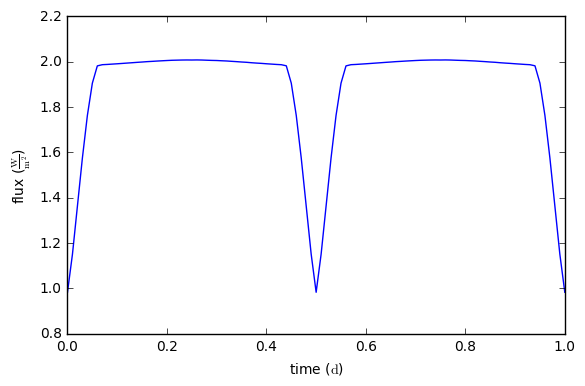

In [24]:
axs, artists = b['lc@model'].plot()

Since these are the only two columns available in the synthetic model, the only other option is to plot in phase instead of time.

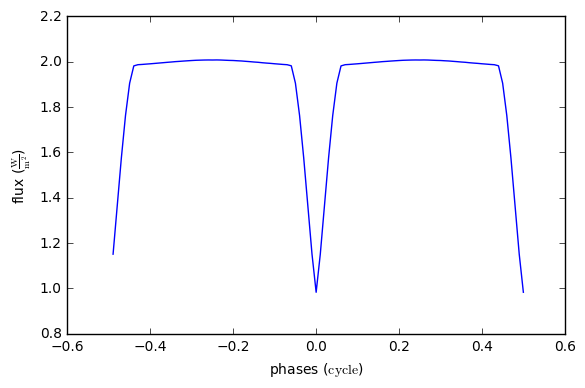

In [25]:
axs, artists = b['lc@model'].plot(x='phases')

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [26]:
b['period'].components

['binary', 'primary', 'secondary']

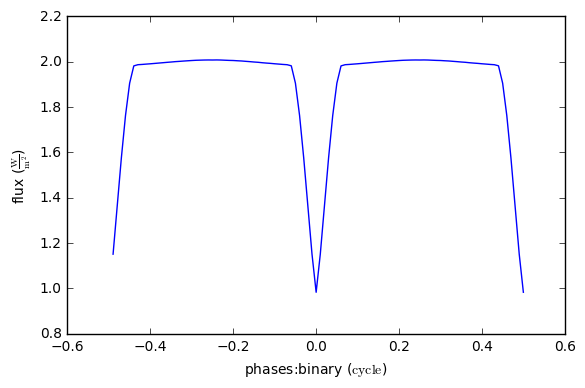

In [27]:
axs, artists = b['lc@model'].plot(x='phases:binary')

Mesh Fields
---------------------

If a mesh dataset exists at any of the same times as the time array in the lc dataset, OR if store_mesh is set to True in the compute options, then flux-related surface element quantities will be available in the model as well.

Let's add a single mesh at the first time of the light-curve and re-call run_compute

In [28]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [29]:
b.run_compute()

Fri, 10 Feb 2017 14:25 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 76 parameters | kinds: mesh, lc>

In [30]:
print b['model'].datasets

['mesh01', 'lc01']


These new columns are stored with the lc's dataset tag, but with the 'mesh' dataset-kind.

In [31]:
b.filter(dataset='lc01', kind='mesh', context='model').twigs

['0.0@pblum@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@boost_factors@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@pblum@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@boost_factors@secondary@lc01@phoebe01@latest@mesh@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [mesh dataset](MESH)), but since the mesh elements are stored with the 'mesh01' dataset tag, and the LC quantities are stored with the 'lc01' dataset tag, it is important not to provide the 'mesh01' dataset tag before plotting.

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:257: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:257: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


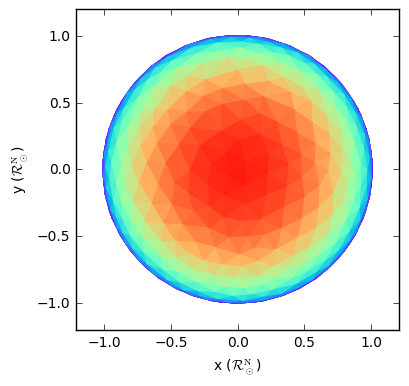

In [32]:
axs, artists = b['mesh@model'].plot(facecolor='intensities', edgecolor=None)
# NOT:
# b['mesh01@model'].plot(facecolor='intensities', edgecolor=None)

Now let's look at each of the available fields.

### pblum

For more details, see the tutorial on [Passband Luminosities](pblum)

In [33]:
print b['pblum@primary@lc01@mesh@model']

Parameter: 0.0@pblum@primary@latest@model
                       Qualifier: pblum
                     Description: Passband Luminosity of entire star
                           Value: 12.6462019393 W
                  Constrained by: 
                      Constrains: None
                      Related to: None



'pblum' is the passband luminosity of the entire star/mesh - this is a single value (unlike most of the parameters in the mesh) and does not have per-element values.

### abs_normal_intensities

In [34]:
print b['abs_normal_intensities@primary@lc01@mesh@model']

Parameter: 0.0@abs_normal_intensities@primary@latest@model
                       Qualifier: abs_normal_intensities
                     Description: Per-element value for lc01 dataset
                           Value: [  8.58256523e+13   8.58317244e+13   8.58258709e+13 ...,
   8.37104087e+13   8.35836556e+13   8.35295494e+13] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'abs_normal_intensities' are the absolute normal intensities per-element.

### normal_intensities

In [35]:
print b['normal_intensities@primary@lc01@mesh@model']

Parameter: 0.0@normal_intensities@primary@latest@model
                       Qualifier: normal_intensities
                     Description: Per-element value for lc01 dataset
                           Value: [  8.36146631e-19   8.36205788e-19   8.36148760e-19 ...,
   8.15539112e-19   8.14304234e-19   8.13777110e-19] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'normal_intensities' are the relative normal intensities per-element.

### abs_intensities

In [36]:
print b['abs_intensities@primary@lc01@mesh@model']

Parameter: 0.0@abs_intensities@primary@latest@model
                       Qualifier: abs_intensities
                     Description: Per-element value for lc01 dataset
                           Value: [  8.53421430e+13   8.53432528e+13   8.53423603e+13 ...,
   7.24990695e+13   7.53334723e+13   7.70215869e+13] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'abs_intensities' are the projected absolute intensities (towards the observer) per-element.

### intensities

In [37]:
print b['intensities@primary@lc01@mesh@model']

Parameter: 0.0@intensities@primary@latest@model
                       Qualifier: intensities
                     Description: Per-element value for lc01 dataset
                           Value: [  8.31436097e-19   8.31446909e-19   8.31438213e-19 ...,
   7.06313918e-19   7.33927763e-19   7.50374027e-19] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'intensities' are the projected relative intensities (towards the observer) per-element.

### boost_factors

In [38]:
print b['boost_factors@primary@lc01@mesh@model']

Parameter: 0.0@boost_factors@primary@latest@model
                       Qualifier: boost_factors
                     Description: Per-element value for lc01 dataset
                           Value: [ 1.  1.  1. ...,  1.  1.  1.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



'boost_factors' are the boosting amplitudes per-element.